### 6.1.3 우리에게 필요한 건 활성 함수

#### 출력 범위 제한

#### 출력 범위 줄이기

In [1]:
import math

In [3]:
math.tanh(-2.2)

-0.9757431300314515

In [4]:
math.tanh(0.1)

0.09966799462495582

In [5]:
math.tanh(2.5)

0.9866142981514303

## 6.2 파이토치 nn 모듈

### 6.2.1 forward eotls __call__ 사용하기

In [7]:
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [6]:
import torch.nn as nn

In [10]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

n_samples, shuffled_indices

(11, tensor([ 9,  5,  1,  8,  4,  6,  7,  0, 10,  3,  2]))

In [11]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  5,  1,  8,  4,  6,  7,  0, 10]), tensor([3, 2]))

In [12]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [13]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[7.9943],
        [5.9655]], grad_fn=<AddmmBackward0>)

### 6.2.2 다시 선형 모델로

In [14]:
import torch.nn as nn

In [15]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[2.3475],
        [1.4980]], grad_fn=<AddmmBackward0>)

In [16]:
linear_model.weight

Parameter containing:
tensor([[0.3584]], requires_grad=True)

In [17]:
linear_model.bias

Parameter containing:
tensor([-0.5881], requires_grad=True)

In [18]:
x = torch.ones(1)
linear_model(x)

tensor([-0.2297], grad_fn=<AddBackward0>)

#### 배치 입력 만들기

In [19]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297],
        [-0.2297]], grad_fn=<AddmmBackward0>)

#### 배치 최적화

In [44]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape, t_c.shape

(torch.Size([11, 1]), torch.Size([11, 1]))

In [55]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([4, 5, 9, 8, 3, 2, 6, 7, 0]), tensor([10,  1]))

In [56]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [57]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [58]:
linear_model.parameters()

<generator object Module.parameters at 0x7f32142907b0>

In [59]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.4734]], requires_grad=True),
 Parameter containing:
 tensor([-0.6073], requires_grad=True)]

In [60]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f},'
                  f' Validation loss {loss_val.item():.4f}')

In [61]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

Epoch 1, Training loss 72.6930, Validation loss 141.8302
Epoch 1000, Training loss 3.5887, Validation loss 5.5397
Epoch 2000, Training loss 2.9540, Validation loss 4.1057
Epoch 3000, Training loss 2.9416, Validation loss 3.9282


In [62]:
print()
print(linear_model.weight)
print(linear_model.bias)


Parameter containing:
tensor([[5.2049]], requires_grad=True)
Parameter containing:
tensor([-16.8150], requires_grad=True)


## 6.3 드디어 신경망

### 6.3.1 선형 모델 대체하기

In [63]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1),
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

### 6.3.2 파라미터 살펴보기

In [64]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [65]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [66]:
from collections import OrderedDict

In [67]:
seq_model = nn.Sequential(
    OrderedDict([
        ('hidden_linear', nn.Linear(1, 8)),
        ('hidden_activation', nn.Tanh()),
        ('output_linear', nn.Linear(8, 1)),
    ])
)

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [68]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [69]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0767], requires_grad=True)

In [70]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 162.1822, Validation loss 325.8019
Epoch 1000, Training loss 6.4769, Validation loss 5.9607
Epoch 2000, Training loss 2.3249, Validation loss 3.0996
Epoch 3000, Training loss 1.6904, Validation loss 3.3559
Epoch 4000, Training loss 1.5646, Validation loss 3.5961
Epoch 5000, Training loss 1.5302, Validation loss 3.7330
output tensor([[20.4220],
        [11.3294]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [14.]])
hidden tensor([[-2.2494e-05],
        [-1.6645e-02],
        [-1.4608e-03],
        [-8.2197e-04],
        [-3.4854e-02],
        [-5.4738e-04],
        [ 1.4925e-02],
        [-7.0640e-03]])


### 6.3.3 선형 모델과 비교하기

In [71]:
from matplotlib import pyplot as plt

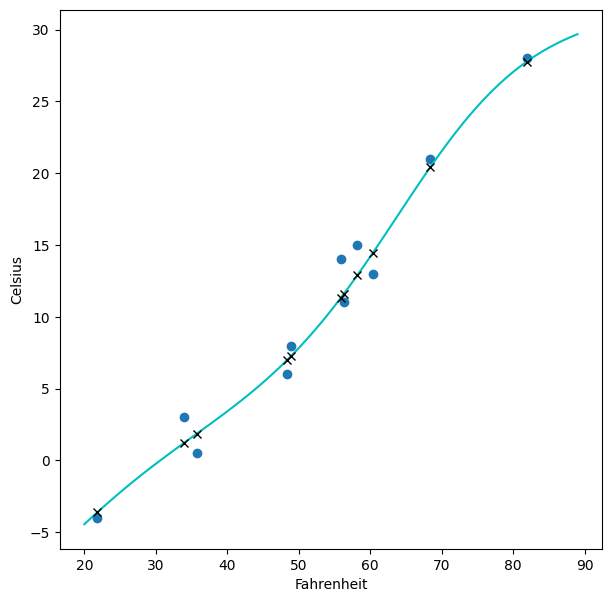

In [74]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(figsize=(7, 7))
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')